# **<span style="color:red">Imports</span>**

In [1]:
# Math
import math
# Handy arrays
import numpy as np
# FFTs
import scipy.fft as fft
import scipy.fftpack as fftp

# Custom modules
import lib.utils.utils as Utils
import lib.utils.plotting as Plotting
import lib.utils.otf as OTF

# **<span style="color:red">Notes</span>**

In [2]:
import math

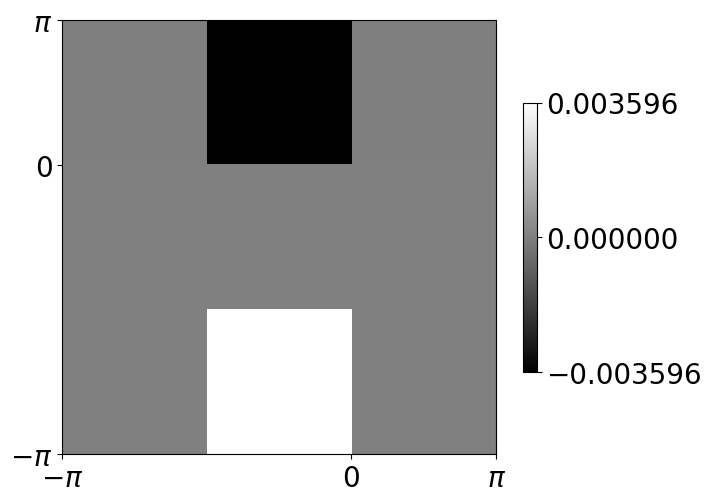

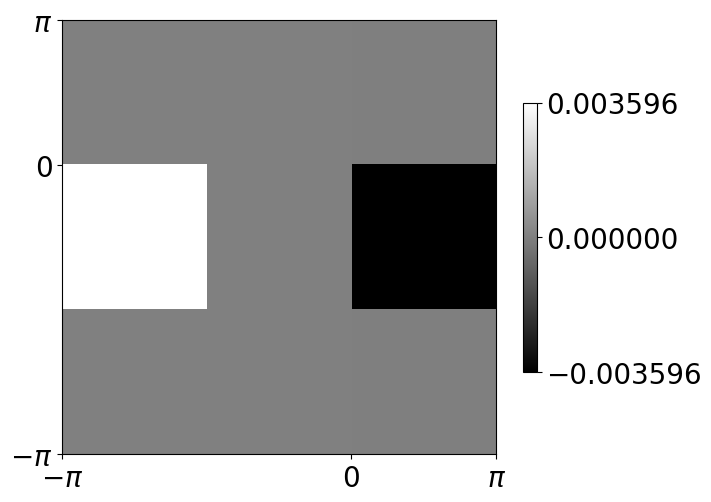

In [3]:
# Create grid
X,Y = Utils.create_matrix_grid_coordinates((3,3), symmetry=True)

sigma = 1
sigma2 = sigma * sigma

gaussX = (-X/sigma2) * np.exp(-((X**2 + Y**2)/(2*sigma2))) / (2*math.pi*sigma2)
gaussY = (-Y/sigma2) * np.exp(-((X**2 + Y**2)/(2*sigma2))) / (2*math.pi*sigma2)

Plotting.plot_image(gaussX)
Plotting.plot_image(gaussY)

In [4]:
import lib.pgs.sample_presets as SamplePresets

In [5]:
image = Utils.image_load('Samples/Samples Fundus/3/1.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset1 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PGS)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

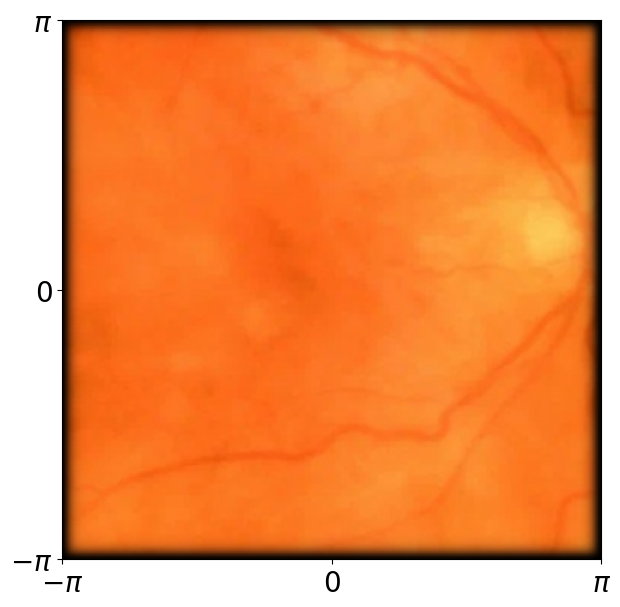

In [6]:
Plotting.plot_image(sample_preset1.image)

In [7]:
image = Utils.image_load('Samples/Samples Fundus/3/2.png', mode='rgb')
window_func = Utils.create_super_gauss(image.shape[0:2], 10.8/11, 10, mode='square')
sample_preset2 = SamplePresets.SamplePreset(Utils.rgb_mul_mono(image, window_func),
                                             'Results_(PGS)/Sample_2/', np.loadtxt("Data/detector_funcs.csv", delimiter=";"),
                                             2e-2, 0.003, 1,
                                             np.arange(0.0008, 0.04, 0.0008).astype(np.float64), np.arange(305, 405, 2).astype(np.float64),
                                             0.0025, 420,
                                             [0.5, 1.3], 165, 200)

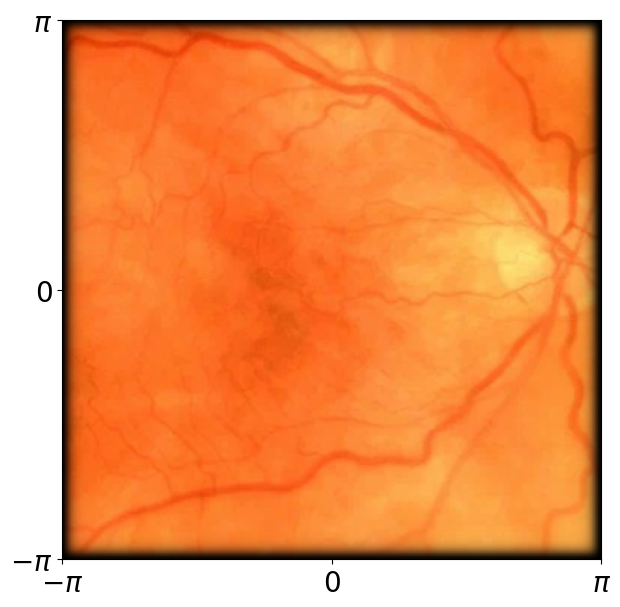

In [8]:
Plotting.plot_image(sample_preset2.image)

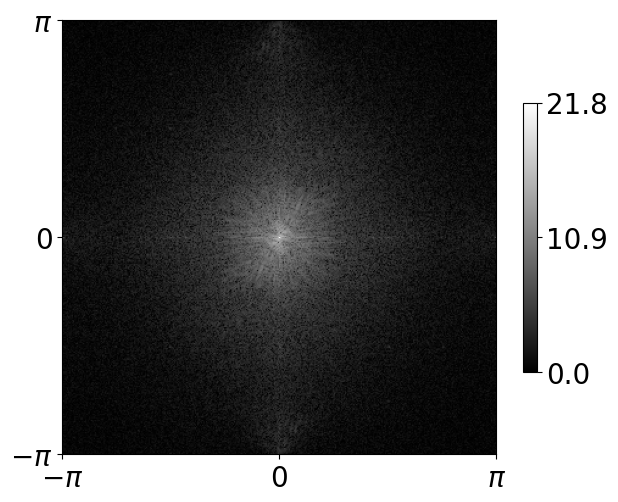

In [9]:
Plotting.plot_spectrum(Utils.image_normalize(sample_preset1.image - sample_preset2.image)[:,:,1])

In [22]:
channel = 2

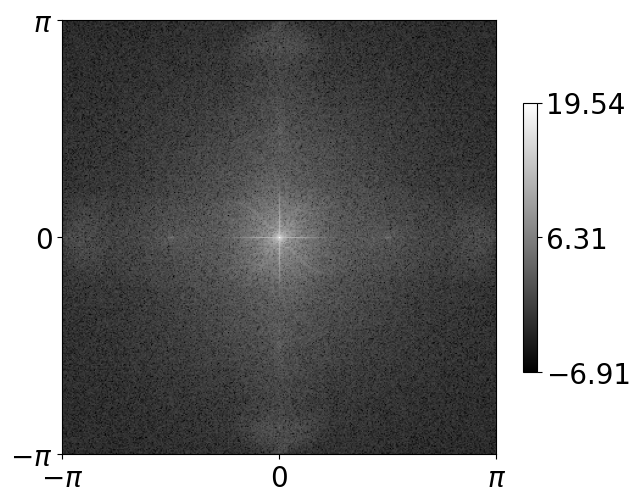

In [23]:
channel_spec_1 = np.log(1e-3 + fftp.fftshift(Utils.get_squared_complex_module(fft.fft2(sample_preset1.image[:,:,channel]))))
Plotting.plot_image(channel_spec_1)

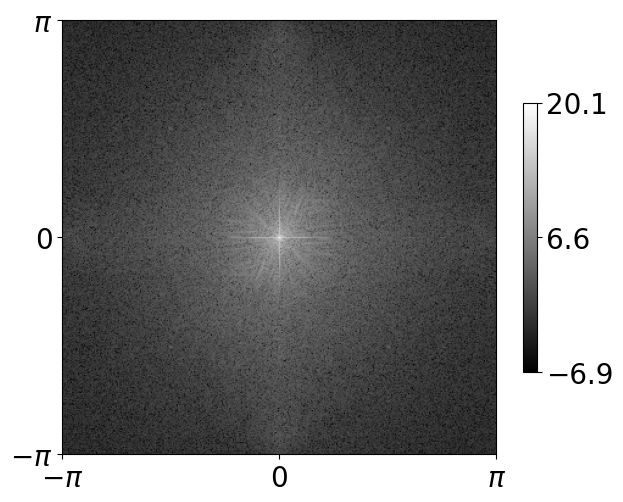

In [24]:
channel_spec_2 = np.log(1e-3 + fftp.fftshift(Utils.get_squared_complex_module(fft.fft2(sample_preset2.image[:,:,channel]))))
Plotting.plot_image(channel_spec_2)

In [14]:
import scipy.signal as Signal

In [37]:
factor = 1e-4

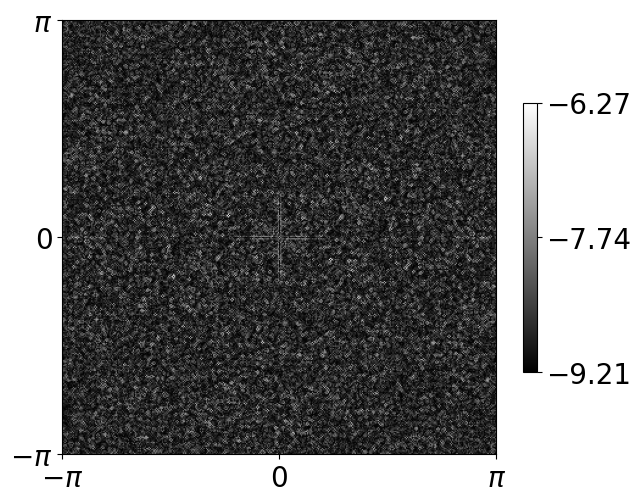

In [38]:
gradX = Signal.convolve2d(channel_spec_1, gaussX, boundary='wrap', mode='same')
gradY = Signal.convolve2d(channel_spec_1, gaussY, boundary='wrap', mode='same')
grad1 = np.log(factor + gradX**2 + gradY**2)
Plotting.plot_image(grad1)

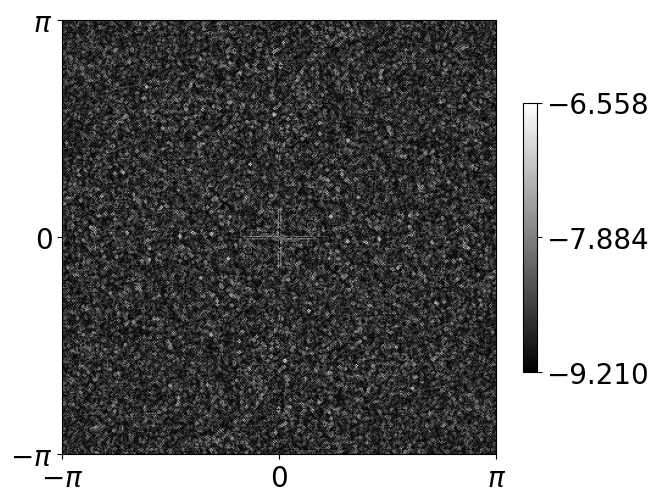

In [39]:
gradX = Signal.convolve2d(channel_spec_2, gaussX, boundary='wrap', mode='same')
gradY = Signal.convolve2d(channel_spec_2, gaussY, boundary='wrap', mode='same')
grad2 = np.log(factor + gradX**2 + gradY**2)
Plotting.plot_image(grad2)

In [41]:
import lib.utils.metrics as metrics

In [46]:
print('SSIM %4f' % metrics.compare_images_ssim(Utils.image_normalize(sample_preset1.image[:,:,channel]), Utils.image_normalize(sample_preset2.image[:,:,channel])))
print('SSIM SPEC %4f' % metrics.compare_images_ssim(Utils.image_normalize(channel_spec_1), Utils.image_normalize(channel_spec_2)))
print('SSIM SPEC GRAD %4f' % metrics.compare_images_ssim(Utils.image_normalize(grad1), Utils.image_normalize(grad2)))

SSIM 0.570992
SSIM SPEC 0.176960
SSIM SPEC GRAD 0.022781
